In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
url = r"C:\Users\Administrator\Downloads\archive (1)\WA_Fn-UseC_-Telco-Customer-Churn.csv"  # Example URL

# Read the content as CSV directly from the response
df = pd.read_csv(url)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# df.duplicated().sum()

In [5]:
# df.isnull().sum()

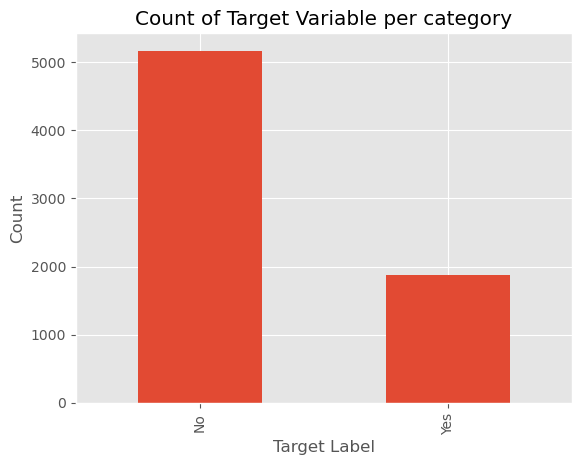

In [6]:
ax = df['Churn'].value_counts().plot(kind='bar', title="Count of Target Variable per category")
ax.set_xlabel('Target Label')
ax.set_ylabel('Count')
plt.show()

In [7]:
# Dropping TotalCharges rows with blank spaces 
df_1 = df[df['TotalCharges'] != ' ']
df_1.shape

(7032, 21)

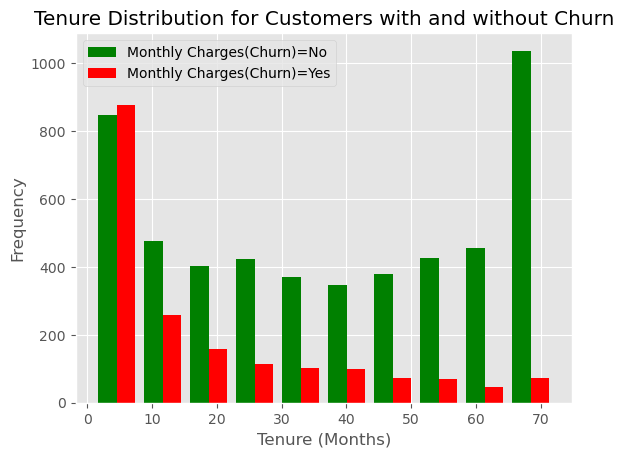

In [8]:
# Data Visualization on tenure(In no. of months)(How loyal the customer is) column
no_churn_df = df_1[df_1['Churn'] == 'No']['tenure']
churn_df = df_1[df_1['Churn'] == 'Yes']['tenure']

plt.hist([no_churn_df, churn_df], label=['Monthly Charges(Churn)=No', 'Monthly Charges(Churn)=Yes'], color=['Green', 'Red'])
plt.legend()
plt.title('Tenure Distribution for Customers with and without Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

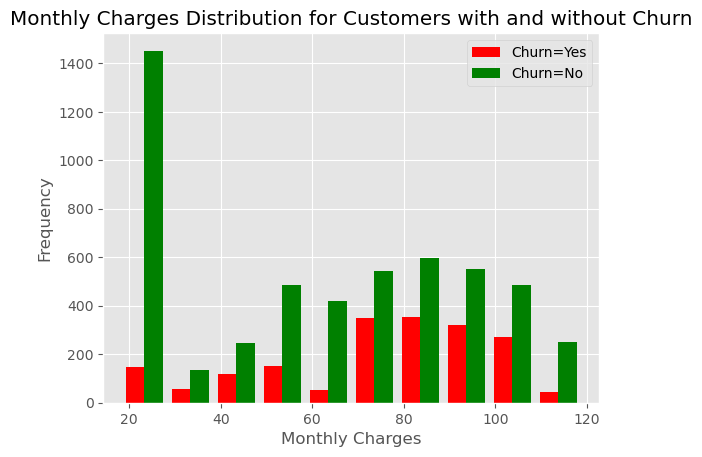

In [9]:
# Filter data for MonthlyCharges for customers who churned and those who did not churn
df_with_monthly_charges = df_1[df_1['Churn'] == 'Yes']['MonthlyCharges']
df_without_monthly_charges = df_1[df_1['Churn'] == 'No']['MonthlyCharges']

# Plot histograms with proper labels and colors
plt.hist([df_with_monthly_charges, df_without_monthly_charges], 
         label=['Churn=Yes', 'Churn=No'], 
         color=['Red', 'Green'])

plt.legend()
plt.title('Monthly Charges Distribution for Customers with and without Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()


In [10]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# Define the custom transformation function
def replace_service_values(df):
    columns_to_replace = [
        'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
    ]
    # Replace 'No phone service' and 'No internet service' with 'No'
    df[columns_to_replace] = df[columns_to_replace].replace(
        {'No phone service': 'No', 'No internet service': 'No'}
    )
    return df

# Create a pipeline that includes the custom transformation
pipeline = Pipeline([
    ('replace_service', FunctionTransformer(replace_service_values, validate=False))
])

# Apply the pipeline to the DataFrame
df_transformed = pipeline.fit_transform(df_1)

# Display the transformed DataFrame
df_transformed.head()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18192\158280269.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_replace] = df[columns_to_replace].replace(


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
for column in df_1:
    if df[column].dtypes == 'object':
        print(f'{column}: {df[column].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [12]:
# For columns with Yes or No

from sklearn.base import BaseEstimator, TransformerMixin


# Define a custom transformer to replace 'Yes'/'No' with 1/0
class YesNoToOneZeroTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # No fitting required for this simple transformation
        return self
    
    def transform(self, X):
        # Replace 'Yes' with 1 and 'No' with 0 across the DataFrame
        return X.replace({'Yes': 1, 'No': 0})

# Define the columns to be transformed (all columns with 'Yes'/'No' values)
columns_to_transform = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'PaperlessBilling', 'Churn'
]

# Create the pipeline using the custom transformer
pipeline = Pipeline([
    ('yes_no_to_1_0', YesNoToOneZeroTransformer())
])

# Apply the pipeline to the relevant columns
df_1[columns_to_transform] = pipeline.fit_transform(df_1[columns_to_transform])

# Display the transformed DataFrame
df_1.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18192\149181116.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return X.replace({'Yes': 1, 'No': 0})
C:\Users\Administrator\AppData\Local\Temp\ipykernel_18192\149181116.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[columns_to_transform] = pipeline.fit_transform(df_1[columns_to_transform])


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pandas as pd



# Define a custom function to apply LabelEncoder to a single column
def encode_gender(df):
    le = LabelEncoder()
    df['gender'] = le.fit_transform(df['gender'])
    return df

# Define the pipeline with a FunctionTransformer to apply the custom encoding function
pipeline = Pipeline(steps=[
    ('gender_encoder', FunctionTransformer(encode_gender, validate=False))
])

# Apply the pipeline and store the result back in df_1
df_1 = pipeline.fit_transform(df_1)

# Display the updated df_1
df_1.head()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18192\1816045322.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = le.fit_transform(df['gender'])


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [14]:
df_1 = pd.get_dummies(df_1, columns=['InternetService', 'Contract', 'PaymentMethod'], dtype='int')

df_1.drop(labels='customerID', inplace=True, axis=1)

In [15]:
df_1['TotalCharges'] = df_1['TotalCharges'].astype('float')

In [16]:
for column in df_1:
        print(f'{column}: {df_1[column].unique()}')



gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int32  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [18]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_1[cols_to_scale] = scaler.fit_transform(df_1[cols_to_scale])

In [19]:
X = df_1.drop('Churn',axis='columns')
y = df_1['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [20]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


C:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7354 - loss: 0.5563
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7981 - loss: 0.4343
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7990 - loss: 0.4162
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8102 - loss: 0.4096
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8081 - loss: 0.4122
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8089 - loss: 0.4100
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8040 - loss: 0.4091
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8115 - loss: 0.4029
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8202 - loss: 0.3876
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8183 - loss: 0.4014
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8072 - loss: 0.3999
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [21]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7803 - loss: 0.4753


[0.474925696849823, 0.7704335451126099]

In [22]:
yp = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [23]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.7076555 ],
       [0.73874354],
       [0.01336546],
       [0.71692324],
       [0.46170858]], dtype=float32)

In [24]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [25]:
y_pred[:10]

[1, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [26]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [27]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       999
           1       0.61      0.57      0.59       408

    accuracy                           0.77      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.77      0.77      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

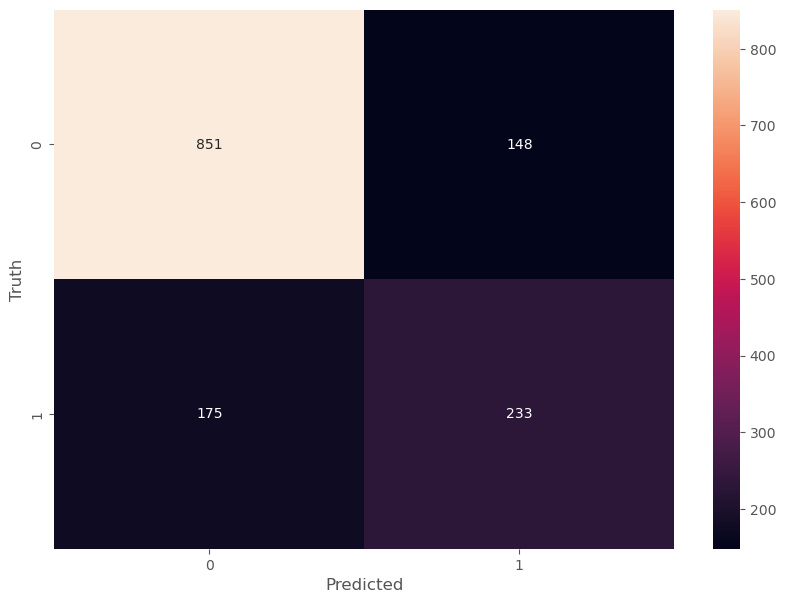

In [28]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# FLASK

In [2]:
!pip install flask

In [3]:

# coding: utf-8

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from flask import Flask, request, render_template
import pickle

app = Flask("__name__")

# df_1=pd.read_csv("first_telc.csv")

q = ""

@app.route("/")
def loadPage():
    return render_template('home.html', query="")


@app.route("/", methods=['POST'])
def predict():
    
    '''
    SeniorCitizen
    MonthlyCharges
    TotalCharges
    gender
    Partner
    Dependents
    PhoneService
    MultipleLines
    InternetService
    OnlineSecurity
    OnlineBackup
    DeviceProtection
    TechSupport
    StreamingTV
    StreamingMovies
    Contract
    PaperlessBilling
    PaymentMethod
    tenure
    '''
    

    
    inputQuery1 = request.form['query1']
    inputQuery2 = request.form['query2']
    inputQuery3 = request.form['query3']
    inputQuery4 = request.form['query4']
    inputQuery5 = request.form['query5']
    inputQuery6 = request.form['query6']
    inputQuery7 = request.form['query7']
    inputQuery8 = request.form['query8']
    inputQuery9 = request.form['query9']
    inputQuery10 = request.form['query10']
    inputQuery11 = request.form['query11']
    inputQuery12 = request.form['query12']
    inputQuery13 = request.form['query13']
    inputQuery14 = request.form['query14']
    inputQuery15 = request.form['query15']
    inputQuery16 = request.form['query16']
    inputQuery17 = request.form['query17']
    inputQuery18 = request.form['query18']
    inputQuery19 = request.form['query19']

    model = pickle.load(open("model.sav", "rb"))
    
    data = [[inputQuery1, inputQuery2, inputQuery3, inputQuery4, inputQuery5, inputQuery6, inputQuery7, 
             inputQuery8, inputQuery9, inputQuery10, inputQuery11, inputQuery12, inputQuery13, inputQuery14,
             inputQuery15, inputQuery16, inputQuery17, inputQuery18, inputQuery19]]
    
    new_df = pd.DataFrame(data, columns = ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender', 
                                           'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                                           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                           'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                                           'PaymentMethod', 'tenure'])
    
    df_2 = pd.concat([df_1, new_df], ignore_index = True) 
    # Group the tenure in bins of 12 months
    labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
    
    df_2['tenure_group'] = pd.cut(df_2.tenure.astype(int), range(1, 80, 12), right=False, labels=labels)
    #drop column customerID and tenure
    df_2.drop(columns= ['tenure'], axis=1, inplace=True)   
    
    
    
    
    new_df__dummies = pd.get_dummies(df_2[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
           'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
           'Contract', 'PaperlessBilling', 'PaymentMethod','tenure_group']])
    
    
    #final_df=pd.concat([new_df__dummies, new_dummy], axis=1)
        
    
    single = model.predict(new_df__dummies.tail(1))
    probablity = model.predict_proba(new_df__dummies.tail(1))[:,1]
    
    if single==1:
        o1 = "This customer is likely to be churned!!"
        o2 = "Confidence: {}".format(probablity*100)
    else:
        o1 = "This customer is likely to continue!!"
        o2 = "Confidence: {}".format(probablity*100)
        
    return render_template('home.html', output1=o1, output2=o2, 
                           query1 = request.form['query1'], 
                           query2 = request.form['query2'],
                           query3 = request.form['query3'],
                           query4 = request.form['query4'],
                           query5 = request.form['query5'], 
                           query6 = request.form['query6'], 
                           query7 = request.form['query7'], 
                           query8 = request.form['query8'], 
                           query9 = request.form['query9'], 
                           query10 = request.form['query10'], 
                           query11 = request.form['query11'], 
                           query12 = request.form['query12'], 
                           query13 = request.form['query13'], 
                           query14 = request.form['query14'], 
                           query15 = request.form['query15'], 
                           query16 = request.form['query16'], 
                           query17 = request.form['query17'],
                           query18 = request.form['query18'], 
                           query19 = request.form['query19'])
    



In [4]:
if __name__ == '__main__':
    app.run(debug=True, port=5000)


 * Serving Flask app '__name__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [ ]:
from flask import Flask, request, render_template

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('home.html', query="")

# Suppress auto-reloader in debug mode for Jupyter
if __name__ == '__main__':
    import os
    os.environ["FLASK_RUN_FROM_CLI"] = "false"  # Prevent Flask's auto-reloader
    app.run(debug=False, port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [30/Nov/2024 23:14:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2024 23:15:20] "POST / HTTP/1.1" 405 -
127.0.0.1 - - [30/Nov/2024 23:15:20] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [30/Nov/2024 23:16:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2024 23:16:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2024 23:20:31] "POST / HTTP/1.1" 405 -


In [1]:
!pip install request

ERROR: Could not find a version that satisfies the requirement request (from versions: none)
ERROR: No matching distribution found for request
